<a href="https://colab.research.google.com/github/Pujithagorre123/FMML_LAB-1/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

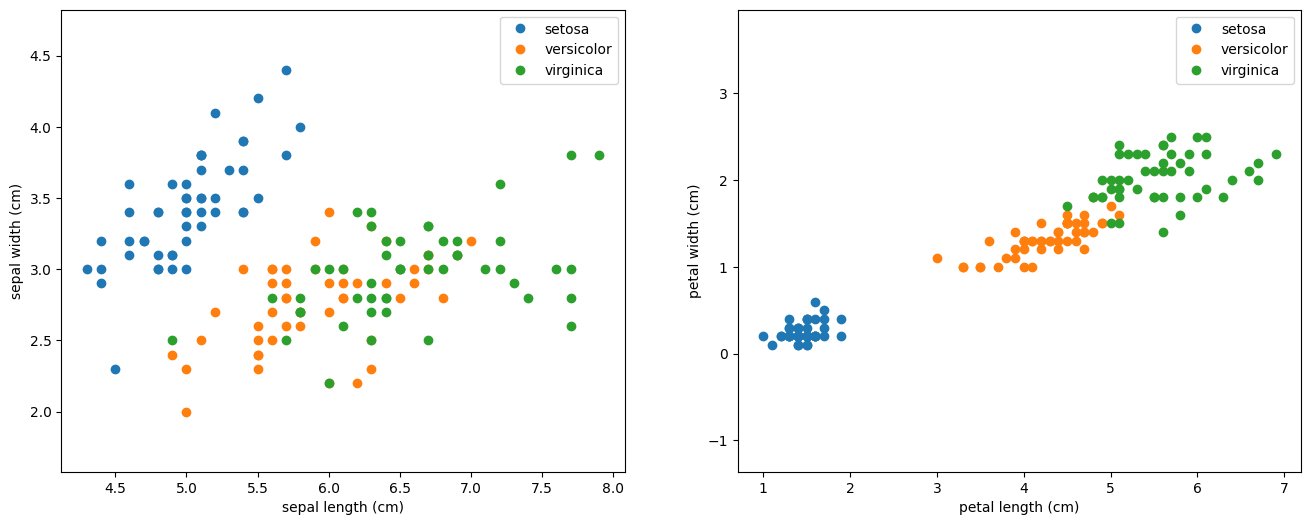

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 299.38it/s]


# Plot training progress

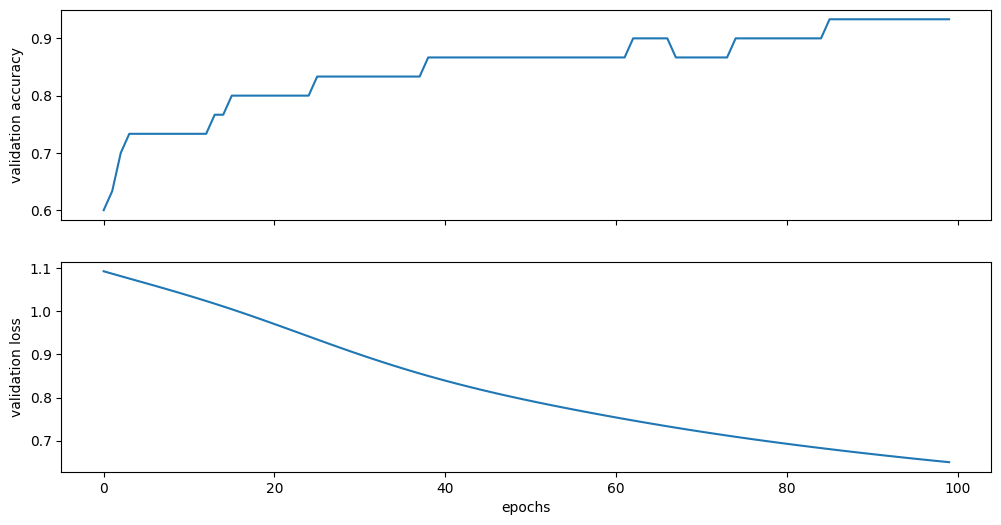

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

ANSWERS

1)changing the number of hidden layers in the Multi-Layer Perceptron (MLP) classifiers for AND, OR, and NOR gates.

In [9]:
from sklearn.neural_network import MLPClassifier

# Define the inputs and outputs for logical gates using -1/+1 logic
X = [[-1, -1],
     [-1, 1],
     [1, -1],
     [1, 1]]

# Define the outputs for AND, OR, and NOR gates
y_and = [-1, -1, -1, 1]
y_or = [-1, 1, 1, 1]
y_nor = [1, -1, -1, -1]

# Create MLP classifiers for AND, OR, and NOR gates with different numbers of hidden layers
mlp_and_1_hidden = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=1000)
mlp_or_2_hidden = MLPClassifier(hidden_layer_sizes=(2, 2), activation='tanh', max_iter=1000)
mlp_nor_3_hidden = MLPClassifier(hidden_layer_sizes=(2, 2, 2), activation='tanh', max_iter=1000)

# Train the classifiers
mlp_and_1_hidden.fit(X, y_and)
mlp_or_2_hidden.fit(X, y_or)
mlp_nor_3_hidden.fit(X, y_nor)

# Test the classifiers
test_data = [[-1, -1], [-1, 1], [1, -1], [1, 1]]

print("AND Gate (MLP with 1 hidden layer):")
for i in test_data:
    print(i, "-->", mlp_and_1_hidden.predict([i])[0])

print("\nOR Gate (MLP with 2 hidden layers):")
for i in test_data:
    print(i, "-->", mlp_or_2_hidden.predict([i])[0])

print("\nNOR Gate (MLP with 3 hidden layers):")
for i in test_data:
    print(i, "-->", mlp_nor_3_hidden.predict([i])[0])


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AND Gate (MLP with 1 hidden layer):
[-1, -1] --> -1
[-1, 1] --> -1
[1, -1] --> -1
[1, 1] --> 1

OR Gate (MLP with 2 hidden layers):
[-1, -1] --> -1
[-1, 1] --> 1
[1, -1] --> 1
[1, 1] --> 1

NOR Gate (MLP with 3 hidden layers):
[-1, -1] --> 1
[-1, 1] --> -1
[1, -1] --> -1
[1, 1] --> -1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


2) the number of neurons in the hidden layer for the Multi-Layer Perceptron (MLP) classifiers for AND, OR, and NOR gates

In [10]:
from sklearn.neural_network import MLPClassifier

# Define the inputs and outputs for logical gates using -1/+1 logic
X = [[-1, -1],
     [-1, 1],
     [1, -1],
     [1, 1]]

# Define the outputs for AND, OR, and NOR gates
y_and = [-1, -1, -1, 1]
y_or = [-1, 1, 1, 1]
y_nor = [1, -1, -1, -1]

# Create MLP classifiers for AND, OR, and NOR gates with different numbers of neurons in the hidden layer
mlp_and_2_neurons = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=1000)
mlp_or_4_neurons = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', max_iter=1000)
mlp_nor_6_neurons = MLPClassifier(hidden_layer_sizes=(6,), activation='tanh', max_iter=1000)

# Train the classifiers
mlp_and_2_neurons.fit(X, y_and)
mlp_or_4_neurons.fit(X, y_or)
mlp_nor_6_neurons.fit(X, y_nor)

# Test the classifiers
test_data = [[-1, -1], [-1, 1], [1, -1], [1, 1]]

print("AND Gate (MLP with 2 neurons in the hidden layer):")
for i in test_data:
    print(i, "-->", mlp_and_2_neurons.predict([i])[0])

print("\nOR Gate (MLP with 4 neurons in the hidden layer):")
for i in test_data:
    print(i, "-->", mlp_or_4_neurons.predict([i])[0])

print("\nNOR Gate (MLP with 6 neurons in the hidden layer):")
for i in test_data:
    print(i, "-->", mlp_nor_6_neurons.predict([i])[0])


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AND Gate (MLP with 2 neurons in the hidden layer):
[-1, -1] --> -1
[-1, 1] --> -1
[1, -1] --> -1
[1, 1] --> 1

OR Gate (MLP with 4 neurons in the hidden layer):
[-1, -1] --> -1
[-1, 1] --> 1
[1, -1] --> 1
[1, 1] --> 1

NOR Gate (MLP with 6 neurons in the hidden layer):
[-1, -1] --> 1
[-1, 1] --> -1
[1, -1] --> -1
[1, 1] --> -1
